In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.feature import match_template
from skimage.feature import peak_local_max

# LOAD IMAGE DATA
image = data.coins()
# Select an interesting area for creating a templat
template = image[170:220, 75:130]

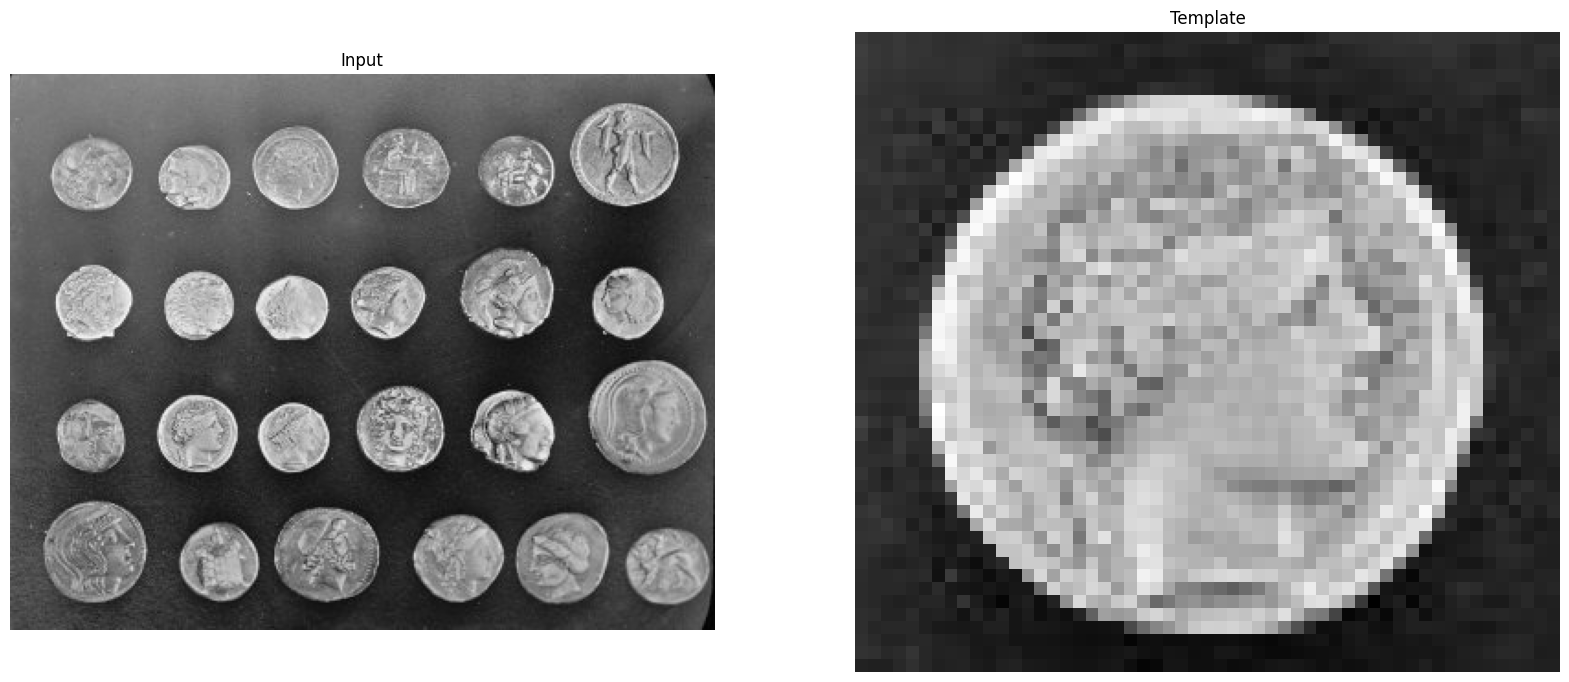

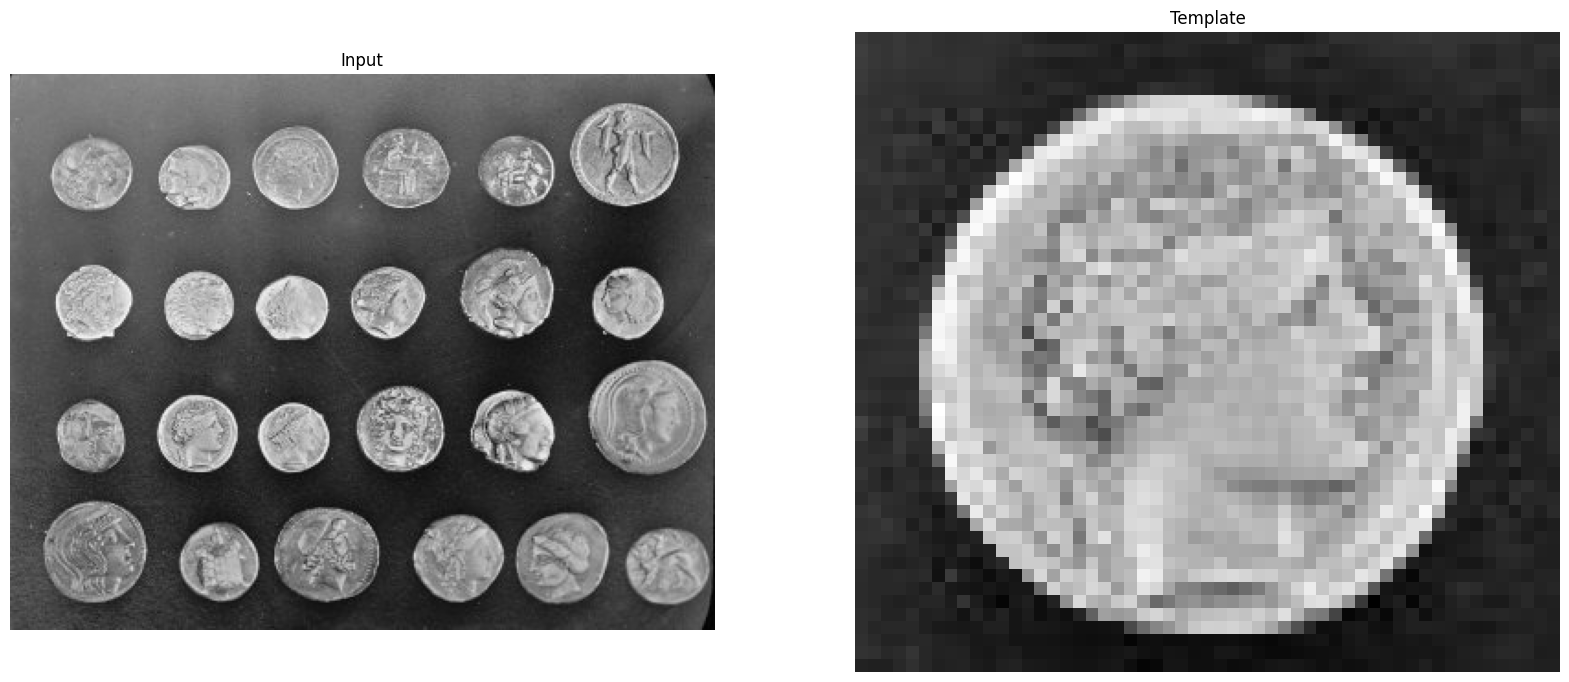

In [2]:
# display the image
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.imshow(image, cmap=plt.cm.gray) 
plt.title('Input')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(template, cmap=plt.cm.gray)
plt.title('Template')
plt.axis('off')

# show it
plt.show()# display the image
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.imshow(image, cmap=plt.cm.gray) 
plt.title('Input')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(template, cmap=plt.cm.gray)
plt.title('Template')
plt.axis('off')

# show it
plt.show()

In [3]:
# Match a template to an input 2-D image using normalized correlation.
# result = match_template(image, template) 
result = match_template(image, template, pad_input=True) #added the pad_input bool 

peaks = peak_local_max(result,min_distance=10,threshold_rel=0.5) # find our peaks

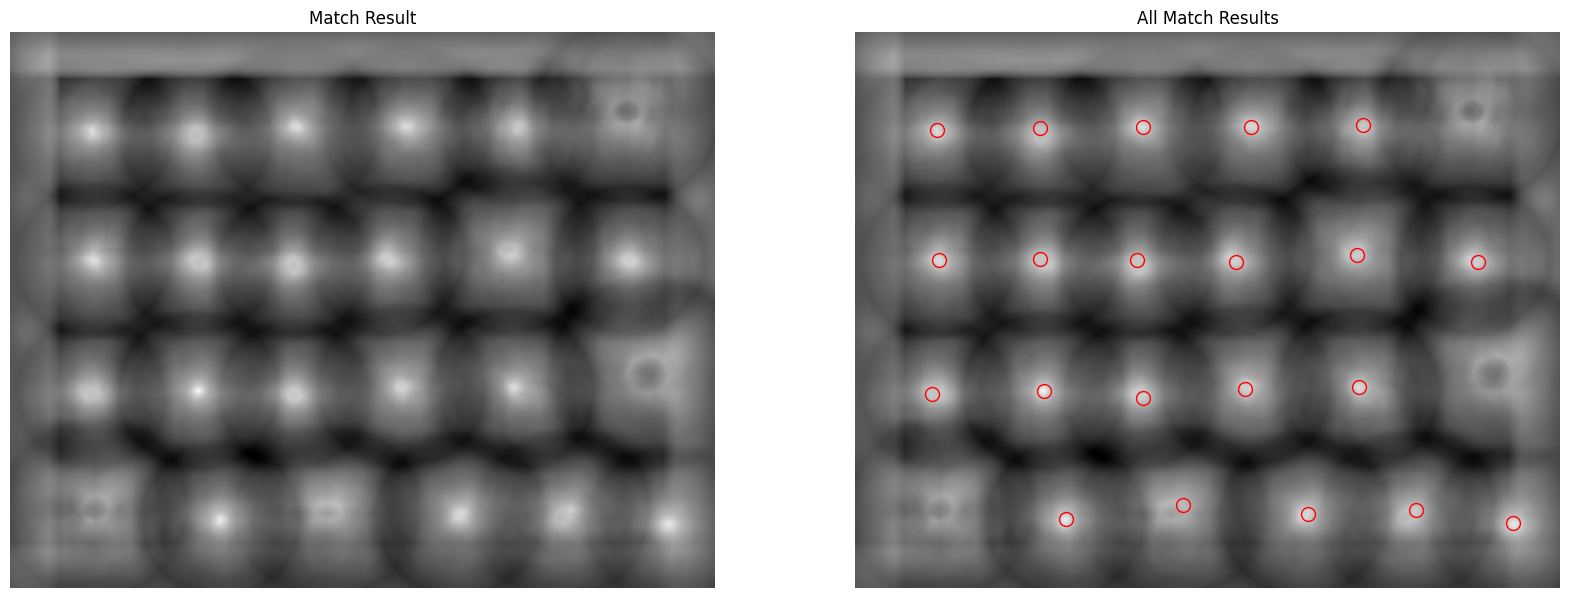

In [4]:
# display the image
fig = plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.imshow(result, cmap=plt.cm.gray) 
plt.title('Match Result')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(result, cmap=plt.cm.gray) 
plt.title('All Match Results')
plt.axis('off')
# highlight matched regions (plural)
plt.plot(peaks[:,1], peaks[:,0], 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

# show it
plt.show()

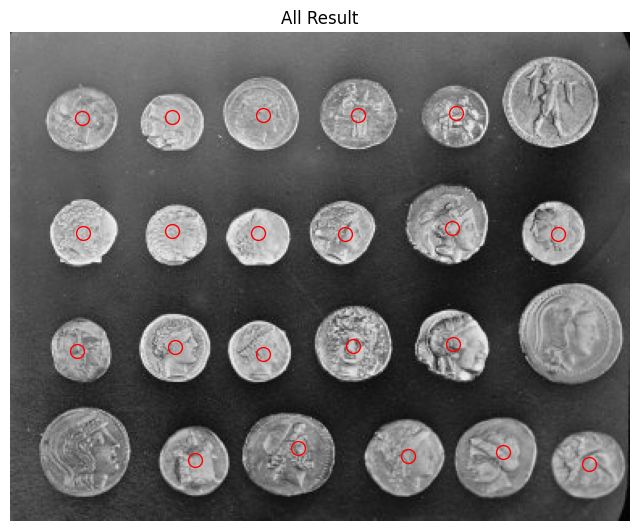

In [5]:
# display the image
plt.figure(figsize=(8,10))

plt.imshow(image, cmap=plt.cm.gray)
plt.axis('off')
plt.title('All Result')
# highlight matched regions (plural)
plt.plot(peaks[:,1], peaks[:,0], 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

# show it
plt.show()

In [6]:
# find the maximum peak location
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]
print(x, y)

102 195


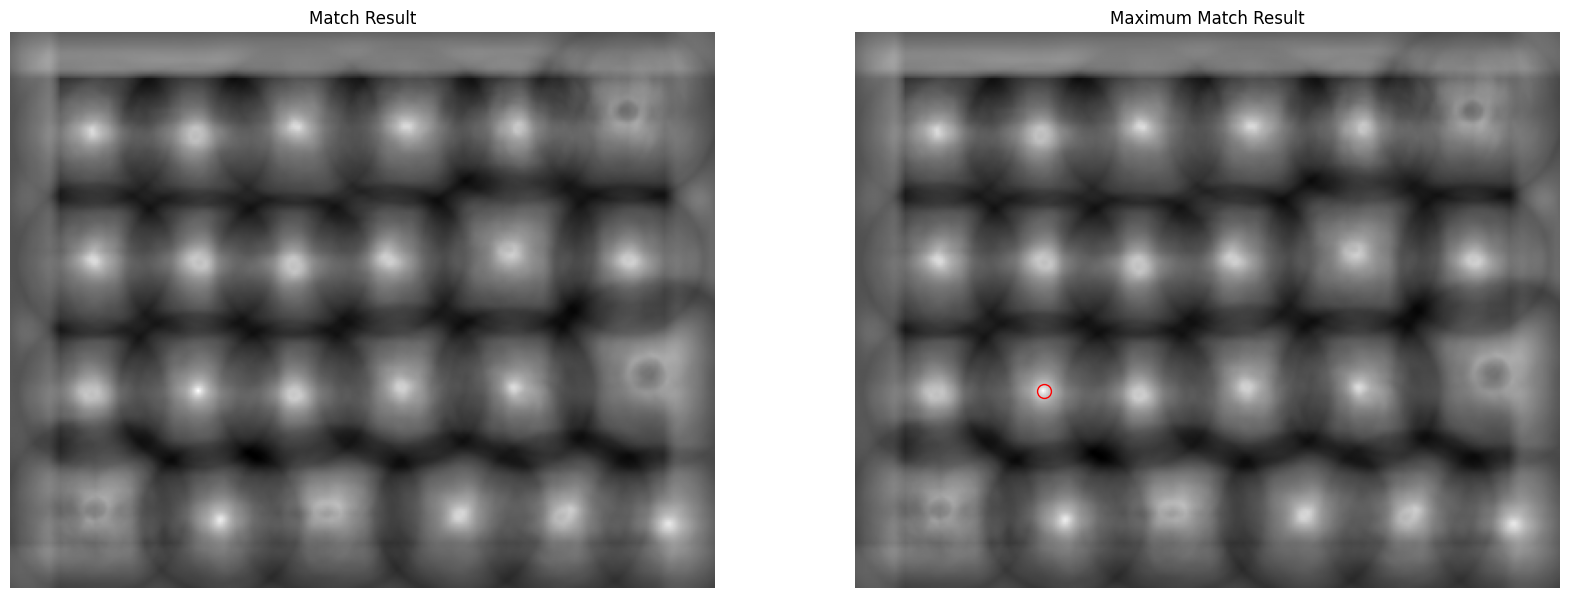

In [7]:
# display the image
fig = plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.imshow(result, cmap=plt.cm.gray) 
plt.title('Match Result')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(result, cmap=plt.cm.gray) 
plt.title('Maximum Match Result')
plt.axis('off')
plt.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

# show it
plt.show()

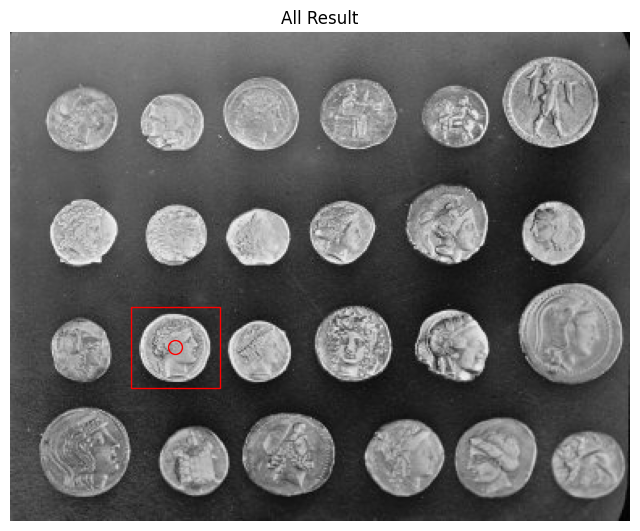

In [8]:
# display the image
plt.figure(figsize=(8,10))

plt.imshow(image, cmap=plt.cm.gray)
plt.axis('off')
plt.title('All Result')
# highlight matched regions (plural)
plt.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

# highlight matched region
ax = plt.gca()
hcoin, wcoin = template.shape
rect = plt.Rectangle((x-wcoin/2, y-hcoin/2), wcoin, hcoin, edgecolor='r', facecolor='none')
ax.add_patch(rect)

# show it
plt.show()